In [18]:
import numpy as np
import scipy.optimize as opt
import scipy.stats as st
import scipy.special as sp
import matplotlib.pyplot as plt

Рассмотрим несимметричное случайное блуждание с p = 0.52 на отрезке [-10,10] с поглощением в -10 и 10. Эмпирически найти вероятность того, что блуждание будет поглощено в -10 и сравнить с матричным выражением (его можно искать численно) из семинара.

In [19]:
p=0.52
p_abs=0
for i in range(100000):
	x=0
	while abs(x)!=10:
		x+=2*(np.random.binomial(size=1,n=2,p=p)-1)
	if x==-10:
		p_abs+=0.00001
print(p_abs)

0.3085300000001678


In [17]:
#в матрице в начале идут состояния -10,10, далее с -9 по 9, т.о. 0 на 11м месте
P=np.matrix([np.zeros(21)]*21)
P[0,0]=1
P[1,1]=1
P[2,0]=0.48
P[20,1]=0.52
for i in range(2,21):
	for j in range(2,21):
		if i+1==j:
			P[i,j]=0.52
		if i-1==j:
			P[i,j]=0.48
print(P)

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.48 0.   0.   0.52 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.48 0.   0.52 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.48 0.   0.52 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.48 0.   0.52 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.48 0.   0.52 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.48 0.   0.52 0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.48 0.   0.52 0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0

In [20]:
C=P[2:,2:]
B=P[2:,:2]
E=np.matrix([np.zeros(19)]*19)
for i in range(19):
	E[i,i]=1
N=np.linalg.inv(E-C)
D=np.matmul(N,B)
print(D[9,0])

[[0.90363848 0.09636152]
 [0.81468938 0.18531062]
 [0.73258252 0.26741748]
 [0.65679157 0.34320843]
 [0.5868307  0.4131693 ]
 [0.52225143 0.47774857]
 [0.4626398  0.5373602 ]
 [0.40761368 0.59238632]
 [0.35682033 0.64317967]
 [0.30993417 0.69006583]
 [0.26665464 0.73334536]
 [0.22670429 0.77329571]
 [0.18982706 0.81017294]
 [0.15578653 0.84421347]
 [0.12436451 0.87563549]
 [0.09535956 0.90464044]
 [0.06858576 0.93141424]
 [0.04387149 0.95612851]
 [0.02105832 0.97894168]]
0.3099341704303591


• Исследовать критерий Колмогорова для маленьких выборок (n = 10) для H0 : Xi ∼ N (0, 1), моделируя Xi ∼ Laplace(1/√2). Использовать а) асимптотический критерий б) точный критерий, определяющий p-value методом Монте-Карло.

In [104]:
def efrone(X,x):
	result=0
	for i in range(len(X)):
		if X[i]<=x:
			result+=1
	return result/len(X)

In [115]:
def kstat(X):
	max=st.norm.cdf(X[0])
	for i in range(1,len(X)):
		if max<abs(i/len(X)-st.norm.cdf(X[i-1])):
			max=abs(i/len(X)-st.norm.cdf(X[i-1]))
		if max<abs(i/len(X)-st.norm.cdf(X[i])):
			max=abs(i/len(X)-st.norm.cdf(X[i]))
	if max<abs(1-st.norm.cdf(X[-1])):
		max=abs(1-st.norm.cdf(X[-1]))
	return len(X)**0.5*max

In [116]:
def counter(X,x):
	for i in range(len(X)):
		if X[len(X)-1-i]<x:
			return (len(X)-i)/len(X)
	return 0

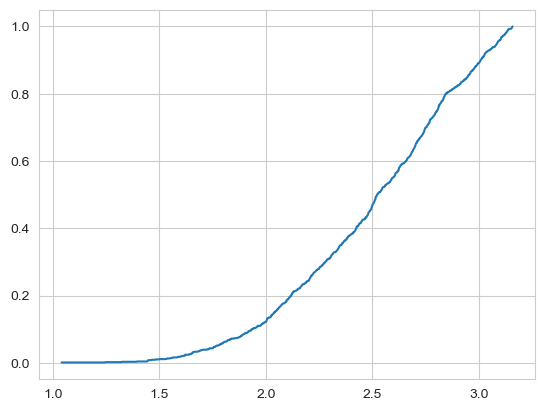

In [120]:
stats=[]
for i in range(1000):
	X=np.random.normal(size=10,loc=0,scale=1)
	stats.append(kstat(X))
stats=np.sort(np.array(stats))
x=np.linspace(np.max(stats),np.min(stats),1000)
plt.plot(x, [efrone(stats,i) for i in x])

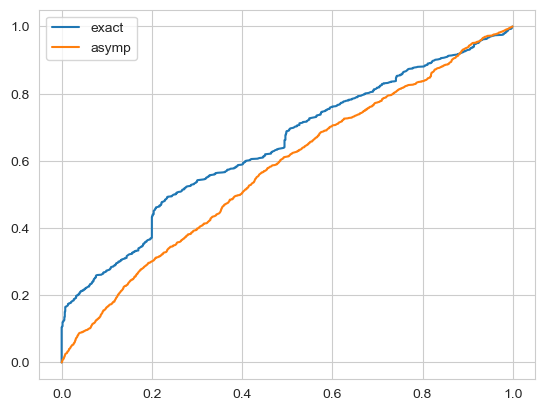

In [126]:
pvals_exact=[]
pvals_asymp=[]
for i in range(1000):
	X=np.random.laplace(size=10,loc=0,scale=2**0.5)
	pvals_exact.append(1-counter(stats,kstat(X)))
	pvals_asymp.append(st.kstest(X,st.norm.cdf,method='asymp').pvalue)
x=np.linspace(0,1,1000)
pvals_exact=np.sort(pvals_exact)
pvals_asymp=np.sort(pvals_asymp)
plt.plot(pvals_exact,x,label='exact')
plt.plot(pvals_asymp,x,label='asymp')
plt.legend()

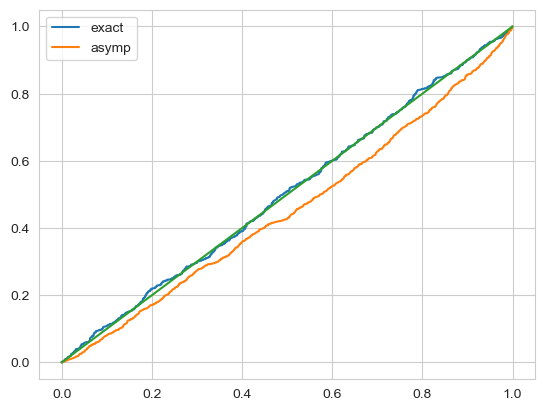

In [128]:
pvals_exact=[]
pvals_asymp=[]
for i in range(1000):
	X=np.random.normal(size=10,loc=0,scale=1)
	pvals_exact.append(1-counter(stats,kstat(X)))
	pvals_asymp.append(st.kstest(X,st.norm.cdf,method='asymp').pvalue)
x=np.linspace(0,1,1000)
pvals_exact=np.sort(pvals_exact)
pvals_asymp=np.sort(pvals_asymp)
plt.plot(pvals_exact,x,label='exact')
plt.plot(pvals_asymp,x,label='asymp')
plt.plot(x,x)
plt.legend()